In [8]:
!pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)


In [5]:
!pip install seaborn

     ------------------------------------ 293.3/293.3 kB 464.8 kB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 264.1 kB/s eta 0:00:00
     -------------------------------------- 10.0/10.0 MB 325.7 kB/s eta 0:00:00
     -------------------------------------- 14.0/14.0 MB 179.3 kB/s eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
  Using cached kiwisolver-1.4.5-cp37-cp37m-win_amd64.whl (55 kB)
  Using cached Pillow-9.5.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Gomolemo.Kototsi\\AppData\\Local\\anaconda3\\envs\\rstudio\\Lib\\site-packages\\pandas\\tests\\scalar\\timestamp\\test_unary_ops.py'
Consider using the `--user` option or check the permissions.



  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
     -------------------------------------- 14.0/14.0 MB 246.2 kB/s eta 0:00:00
  Using cached pandas-1.3.5-cp37-cp37m-win_amd64.whl (10.0 MB)
  Using cached matplotlib-3.5.3-cp37-cp37m-win_amd64.whl (7.2 MB)
     ------------------------------------ 965.4/965.4 kB 582.0 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 312.2 kB/s eta 0:00:00
     -------------------------------------- 55.8/55.8 kB 171.9 kB/s eta 0:00:00
     ------------------------------------ 104.1/104.1 kB 299.9 kB/s eta 0:00:00
     ------------------------------------ 509.2/509.2 kB 234.8 kB/s eta 0:00:00


In [1]:
################################
# Importing necessary libraries#
################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [2]:
###############################
# Data Ingestion & ETL Process#
###############################

# Loading data - Data Ingestion Process
credit = pd.read_csv("C:/Users/Gomolemo.Kototsi/Downloads/credit.csv")

# Identifying the structure of variables
print(credit.info())

# Getting summary of the variables
print(credit.describe())

# Getting the column names
print(credit.columns)

# Tabulating dependent variables
print(credit['default'].value_counts())

# Checking for missing values
#print("Missing values in the dataset:")
print(credit.isnull().sum())

# Note the data if fairly cleaned and transformed which is not typical for real life data and some techniques like scaling,
# highly correlated variables,and using Sklearn imputer to take care of the Missing Variables in the dataset. Luckily sklearn has those libraries 
#installed:

"""
1. Scenario for missing values
from sklearn.impute import SimpleImputer

2. Fearure Scaling scenario:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(credit[numerical_features])

3. For removing correlated variables/features:
correlation_matrix = credit.corr().abs()
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

'\n1. Scenario for missing values\nfrom sklearn.impute import SimpleImputer\n\n2. Fearure Scaling scenario:\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaled_features = scaler.fit_transform(credit[numerical_features])\n\n3. For removing correlated variables/features:\ncorrelation_matrix = credit.corr().abs()\n'

In [3]:
credit['default'].value_counts()

default
no     700
yes    300
Name: count, dtype: int64

In [4]:
# This will show any hidden characters
for col in credit.columns:
    print(f"Column: '{col}', repr: {repr(col)}")

Column: 'checking_balance', repr: 'checking_balance'
Column: 'months_loan_duration', repr: 'months_loan_duration'
Column: 'credit_history', repr: 'credit_history'
Column: 'purpose', repr: 'purpose'
Column: 'amount', repr: 'amount'
Column: 'savings_balance', repr: 'savings_balance'
Column: 'employment_duration', repr: 'employment_duration'
Column: 'percent_of_income', repr: 'percent_of_income'
Column: 'years_at_residence', repr: 'years_at_residence'
Column: 'age', repr: 'age'
Column: 'other_credit', repr: 'other_credit'
Column: 'housing', repr: 'housing'
Column: 'existing_loans_count', repr: 'existing_loans_count'
Column: 'job', repr: 'job'
Column: 'dependents', repr: 'dependents'
Column: 'phone', repr: 'phone'
Column: 'default', repr: 'default'


In [10]:
# Converting categorical variables to dummy variables
credit_encoded = pd.get_dummies(credit, drop_first=True)

In [11]:
X = credit_encoded.drop('default_yes', axis=1)

Train set default distribution:
default_yes
False    0.701429
True     0.298571
Name: proportion, dtype: float64
Test set default distribution:
default_yes
False    0.696667
True     0.303333
Name: proportion, dtype: float64


C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                            Feature  Coefficient
11           credit_history_perfect     1.018667
13         credit_history_very good     0.977132
10              credit_history_good     0.678157
16                purpose_education     0.346810
7           checking_balance_< 0 DM     0.316622
2                 percent_of_income     0.253692
20         savings_balance_< 100 DM     0.206032
12              credit_history_poor     0.177674
24     employment_duration_< 1 year     0.115130
5              existing_loans_count     0.114221
3                years_at_residence     0.022161
0              months_loan_duration     0.022129
26   employment_duration_unemployed     0.019903
6                        dependents     0.011059
14                      purpose_car     0.010316
1                            amount     0.000085
31                      job_skilled    -0.000608
4                               age    -0.030924
32                   job_unemployed    -0.107356
28               oth

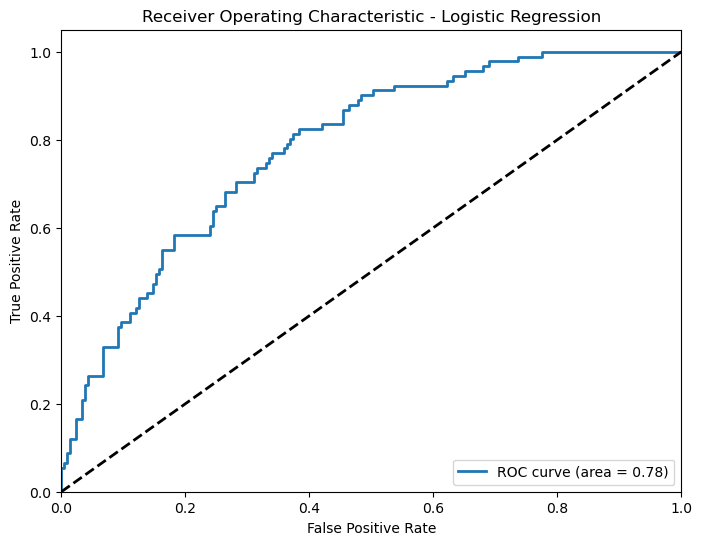

In [18]:
###################################
# Creating Training & Testing Data#
###################################

# Converting categorical variables to dummy variables
credit_encoded = pd.get_dummies(credit, drop_first=True)

# Splitting features and target
X = credit_encoded.drop('default_yes', axis=1)
y = credit_encoded['default_yes']

# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking proportions across train and test
print("Train set default distribution:")
print(pd.Series(y_train).value_counts(normalize=True))
print("Test set default distribution:")
print(pd.Series(y_test).value_counts(normalize=True))

##########################################
# Training a model using logistic regression
##########################################

# Training a model
credit_log_reg = LogisticRegression(max_iter=1000)
credit_log_reg.fit(X_train, y_train)

# Model coefficient summary
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': credit_log_reg.coef_[0]})
print(coef_df.sort_values('Coefficient', ascending=False))

# Predicting on test data
pred_credit_log_reg = credit_log_reg.predict_proba(X_test)[:, 1]  # Probability of credit default

# Obtaining a confusion matrix using 0.5 threshold
pred_classes = (pred_credit_log_reg > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Computing the accuracy of the model
accuracy_credit_log_reg = accuracy_score(y_test, pred_classes)

# Computing the baseline model for comparison
baseline_accuracy = max(pd.Series(y_test).value_counts()) / len(y_test)

print(f"Logistic Regression Accuracy: {accuracy_credit_log_reg}")
print(f"Baseline Accuracy: {baseline_accuracy}")

# Investigating the robustness of model
# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_credit_log_reg)
area_under_curve = auc(fpr, tpr)
print(f"Area under ROC curve: {area_under_curve}")

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {area_under_curve:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [19]:
#######################################
# Training a model using decision trees
#######################################

# Training a model
credit_dec_tree = DecisionTreeClassifier(min_samples_leaf=1)
credit_dec_tree.fit(X_train, y_train)

# Predicting on test data
predict_credit_dec_tree = credit_dec_tree.predict(X_test)  # Getting classes

# Computing the accuracy of the model
conf_matrix_dt = confusion_matrix(y_test, predict_credit_dec_tree)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)

accuracy_credit_dec_tree = accuracy_score(y_test, predict_credit_dec_tree)
print(f"Decision Tree Accuracy: {accuracy_credit_dec_tree}")
print(f"Baseline Accuracy: {baseline_accuracy}")

# Assessing the robustness of model
predict_proba_dec_tree = credit_dec_tree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, predict_proba_dec_tree)
area_under_curve_dt = auc(fpr_dt, tpr_dt)
print(f"Decision Tree Area under ROC curve: {area_under_curve_dt}")

Decision Tree Confusion Matrix:
[[153  56]
 [ 45  46]]
Decision Tree Accuracy: 0.6633333333333333
Baseline Accuracy: 0.6966666666666667
Decision Tree Area under ROC curve: 0.618775960881224


In [22]:
#####################################
# Tuning a model using decision trees
#####################################

# GridSearch for complexity parameter (ccp_alpha in sklearn)
param_grid = {'ccp_alpha': np.arange(0.01, 0.5, 0.01)}

# Creating cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV
tuned_dt = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid=param_grid, 
    cv=cv, 
    scoring='accuracy'
)
tuned_dt.fit(X_train, y_train)

print(f"Best ccp_alpha: {tuned_dt.best_params_}")
print(f"Best CV score: {tuned_dt.best_score_}")

# Predict with tuned model
tuned_predict_credit_dec_tree = tuned_dt.predict(X_test)

# Computing the accuracy of the tuned model
accuracy_tuned_credit_dec_tree = accuracy_score(y_test, tuned_predict_credit_dec_tree)
print(f"Tuned Decision Tree Accuracy: {accuracy_tuned_credit_dec_tree}")

Best ccp_alpha: {'ccp_alpha': 0.01}
Best CV score: 0.7157142857142857
Tuned Decision Tree Accuracy: 0.71


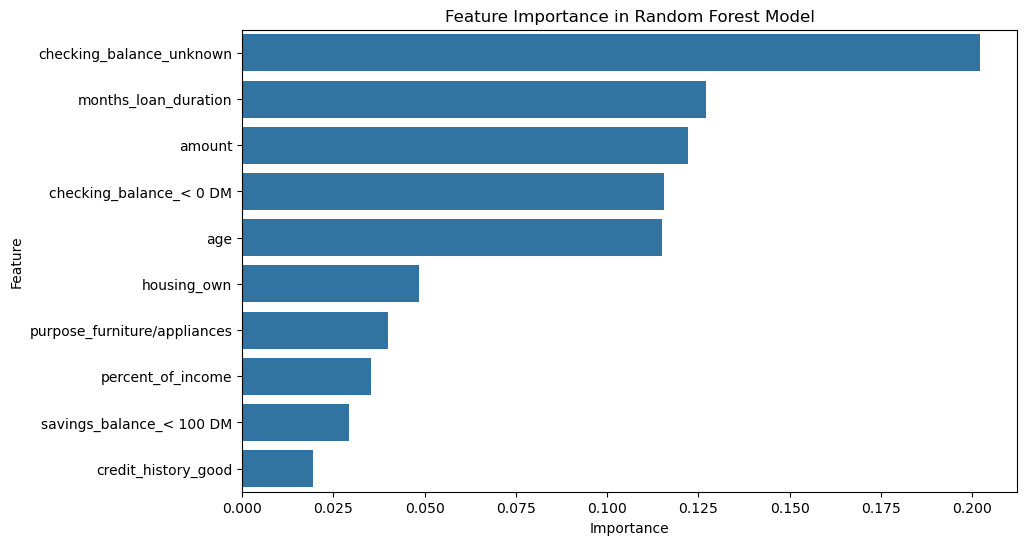

Random Forest Confusion Matrix:
[[208   1]
 [ 87   4]]
Random Forest Accuracy: 0.7066666666666667
Baseline Accuracy: 0.6966666666666667
Random Forest Area under ROC curve: 0.7720700352279299
Fitting 15 folds for each of 5 candidates, totalling 75 fits
Best max_features: {'max_features': 5}
Best CV score: 0.7537766148913513
Tuned Random Forest Accuracy: 0.76


In [24]:
#######################################
# Training a model using random forest
#######################################

# Training a model
credit_rand_for = RandomForestClassifier(min_samples_leaf=25, n_estimators=200, random_state=42)
credit_rand_for.fit(X_train, y_train)

# Identifying the most important variables
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': credit_rand_for.feature_importances_
})
importances = importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances[:10])
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Predicting on test data
predict_credit_rand_for = credit_rand_for.predict(X_test)

# Computing the accuracy of the model
conf_matrix_rf = confusion_matrix(y_test, predict_credit_rand_for)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

accuracy_credit_rand_for = accuracy_score(y_test, predict_credit_rand_for)
print(f"Random Forest Accuracy: {accuracy_credit_rand_for}")
print(f"Baseline Accuracy: {baseline_accuracy}")

# Assessing the robustness of model
predict_proba_rand_for = credit_rand_for.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, predict_proba_rand_for)
area_under_curve_rf = auc(fpr_rf, tpr_rf)
print(f"Random Forest Area under ROC curve: {area_under_curve_rf}")

#######################################
# Tuning a model using random forest
#######################################

n_features = int(np.sqrt(X.shape[1]))
param_grid_rf = {'max_features': list(range(1, n_features + 1))}

# Creating repeated cross-validation strategy
cv_rf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# GridSearchCV
tuned_rf = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid=param_grid_rf, 
    cv=cv_rf, 
    scoring='roc_auc', 
    verbose=1
)
tuned_rf.fit(X_train, y_train)

print(f"Best max_features: {tuned_rf.best_params_}")
print(f"Best CV score: {tuned_rf.best_score_}")

# Predict with tuned model
tuned_predict_credit_rand_for = tuned_rf.predict(X_test)

# Computing the accuracy of the tuned model
accuracy_tuned_credit_rand_for = accuracy_score(y_test, tuned_predict_credit_rand_for)
print(f"Tuned Random Forest Accuracy: {accuracy_tuned_credit_rand_for}")

In [25]:
#######################################
# Tuning a model using random forest
#######################################

n_features = int(np.sqrt(X.shape[1]))
param_grid_rf = {'max_features': list(range(1, n_features + 1))}

# Creating repeated cross-validation strategy
cv_rf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# GridSearchCV
tuned_rf = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid=param_grid_rf, 
    cv=cv_rf, 
    scoring='roc_auc', 
    verbose=1
)
tuned_rf.fit(X_train, y_train)

print(f"Best max_features: {tuned_rf.best_params_}")
print(f"Best CV score: {tuned_rf.best_score_}")

# Predict with tuned model
tuned_predict_credit_rand_for = tuned_rf.predict(X_test)

# Computing the accuracy of the tuned model
accuracy_tuned_credit_rand_for = accuracy_score(y_test, tuned_predict_credit_rand_for)
print(f"Tuned Random Forest Accuracy: {accuracy_tuned_credit_rand_for}")

# Compare all models
models = {
    'Logistic Regression': accuracy_credit_log_reg,
    'Decision Tree': accuracy_credit_dec_tree,
    'Tuned Decision Tree': accuracy_tuned_credit_dec_tree,
    'Random Forest': accuracy_credit_rand_for,
    'Tuned Random Forest': accuracy_tuned_credit_rand_for,
    'Baseline': baseline_accuracy
}

for model, accuracy in models.items():
    print(f"{model}: {accuracy:.4f}")

Fitting 15 folds for each of 5 candidates, totalling 75 fits
Best max_features: {'max_features': 5}
Best CV score: 0.7537766148913513
Tuned Random Forest Accuracy: 0.76
Logistic Regression: 0.7367
Decision Tree: 0.6633
Tuned Decision Tree: 0.7100
Random Forest: 0.7067
Tuned Random Forest: 0.7600
Baseline: 0.6967


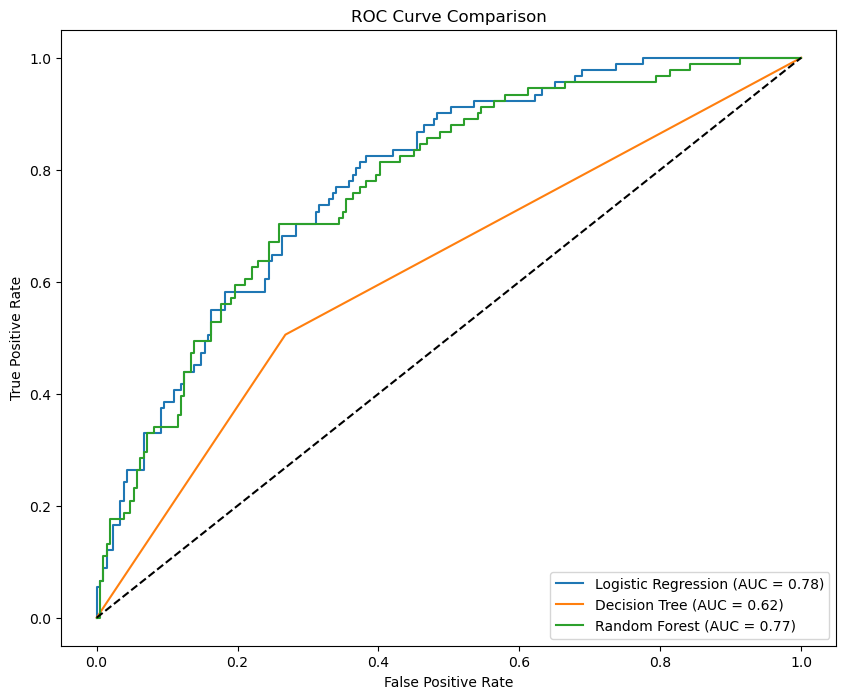

In [26]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {area_under_curve:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {area_under_curve_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {area_under_curve_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()